In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [2]:
N = 100                               # Number of points in each direction
x_start, x_end = -1.0, 1.0            # x-direction boundaries
y_start, y_end = -1.5, 1.5            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [3]:
u_inf = 1.0     # free-stream speed

# calculate the free-stream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [4]:
class Source:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    def stream_function(self,X,Y):
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [5]:
N_sources = 11                                # number of sources
strength = 5.0  

strength_source=strength/N_sources
x_source=numpy.zeros(N_sources,dtype=float)
y_source=numpy.linspace(-1,1,N_sources)

sources=numpy.empty(N_sources,dtype=object)
for i in range(N_sources):
    sources[i]=Source(strength_source,x_source[i],y_source[i])
    sources[i].velocity(X,Y)

In [6]:
u,v=u_freestream,v_freestream
for source in sources:
    u+=source.u
    v+=source.v

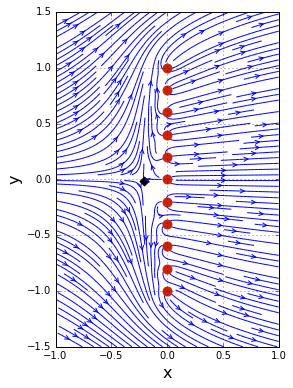

In [7]:
size = 4
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')

magnitude=numpy.sqrt(u**2+v**2)
j_stagn,i_stagn=numpy.unravel_index(magnitude.argmin(), magnitude.shape)
pyplot.scatter(x[i_stagn],y[j_stagn],color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

In [8]:
from scipy import integrate

In [9]:
sigma = 2.5    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

In [10]:
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

In [11]:
def integration(x,y,integrand):
    return integrate.quad(integrand,y_min,y_max,args=(x, y))[0]

In [12]:
vec_integration=numpy.vectorize(integration)

In [13]:
u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

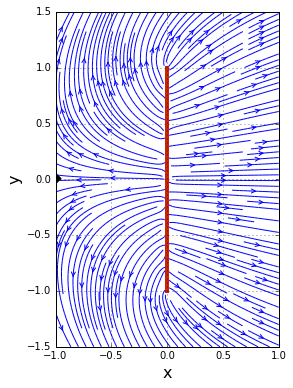

In [14]:
size = 4
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
# plot the source sheet
pyplot.axvline(0.0,
               (y_min-y_start)/(y_end-y_start),
               (y_max-y_start)/(y_end-y_start),
               color='#CD2305', linewidth=4)
# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
# plot the stagnation point
pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);